In [1]:
from RegressionEnvs import RegressionClass as RC
from RNNEnvs import RNNClass as RNN 
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.arima.model import ARIMA
from tensorflow.keras.layers import SimpleRNN, LSTM

In [2]:
ModelRNN = RNN()

for m in [SimpleRNN,LSTM]:
    ModelRNN.Prediction(m)
    ModelRNN.Visualization(m,False)

c:\Users\yoshi\anaconda3\envs\AI_Predictions\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


c:\Users\yoshi\anaconda3\envs\AI_Predictions\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


c:\Users\yoshi\anaconda3\envs\AI_Predictions\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
SimpleRNN: mean Squared Error for each ticker:
AAPL: Train MSE = 0.0137, Valid MSE = 0.0137, Test MSE = 0.0108
IBM: Train MSE = 0.0090, Valid MSE = 0.0074, Test MSE = 0.0052
SPY: Train MSE = 0.0091, Valid MSE = 0.0096, Test MSE = 0.0078


c:\Users\yoshi\anaconda3\envs\AI_Predictions\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


c:\Users\yoshi\anaconda3\envs\AI_Predictions\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


c:\Users\yoshi\anaconda3\envs\AI_Predictions\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
LSTM: mean Squared Error for each ticker:
AAPL: Train MSE = 0.0049, Valid MSE = 0.0063, Test MSE = 0.0017
IBM: Train MSE = 0.0059, Valid MSE = 0.0043, Test MSE = 0.0018
SPY: Train MSE = 0.0046, Valid MSE = 0.0062, Test MSE = 0.0030


In [3]:
ModelRC = RC()

for m in [LinearRegression,ARIMA]:
    ModelRC.Prediction(m)
    ModelRC.Visualization(m,False)

Linear Regression: mean Squared Error for each ticker:
AAPL: Train MSE = 0.0040, Valid MSE = 0.0062, Test MSE = 0.0018
IBM: Train MSE = 0.0054, Valid MSE = 0.0042, Test MSE = 0.0018
SPY: Train MSE = 0.0037, Valid MSE = 0.0064, Test MSE = 0.0031
ARIMA: mean Squared Error for each ticker:
AAPL: Train MSE = 0.0040, Valid MSE = 0.0081, Test MSE = 0.0022
IBM: Train MSE = 0.0054, Valid MSE = 0.0048, Test MSE = 0.0021
SPY: Train MSE = 0.0037, Valid MSE = 0.0096, Test MSE = 0.0047


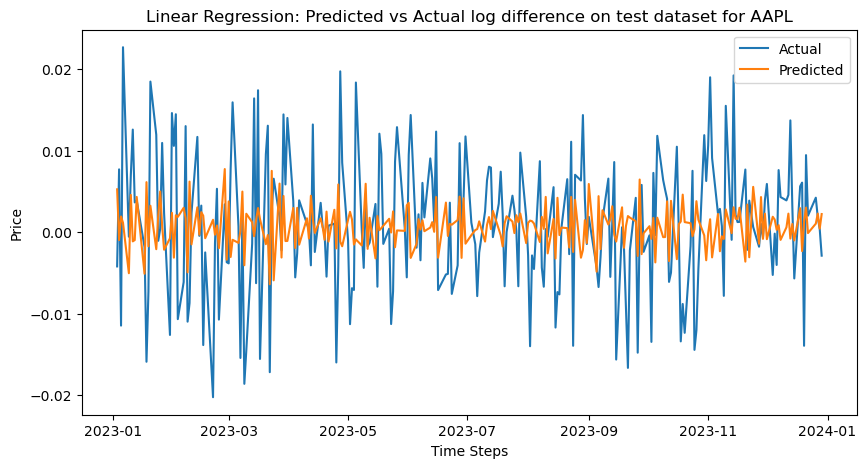

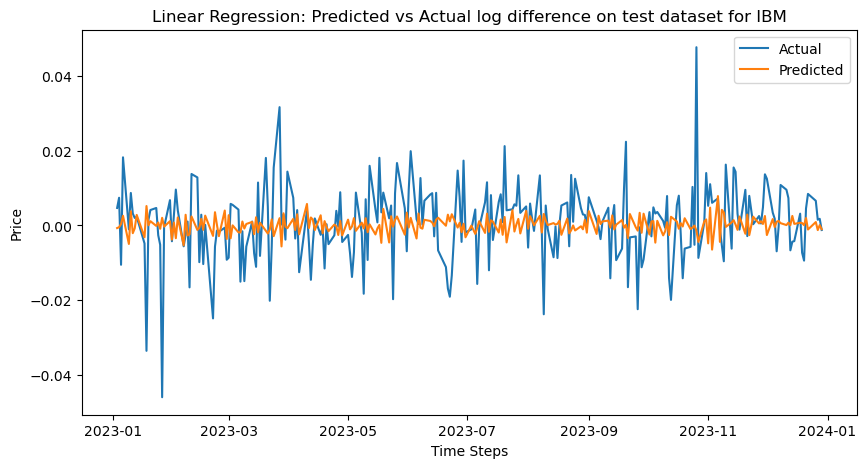

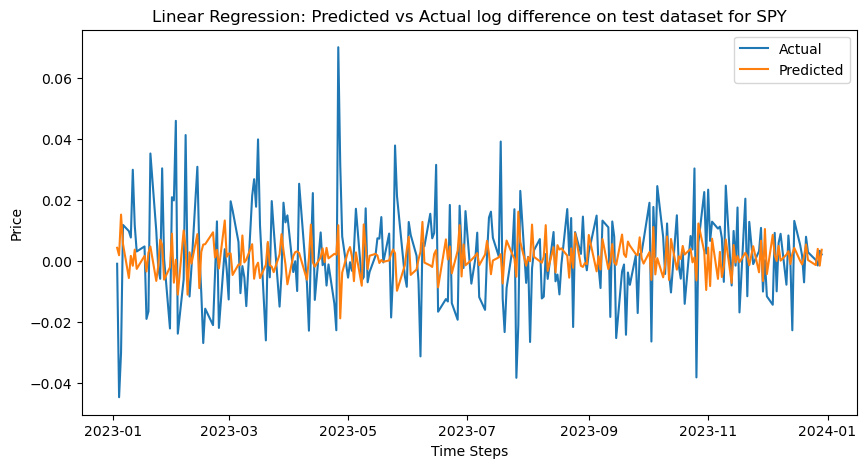

Linear Regression: mean Squared Error for each ticker:
AAPL: Train MSE = 0.0040, Valid MSE = 0.0062, Test MSE = 0.0018
IBM: Train MSE = 0.0054, Valid MSE = 0.0042, Test MSE = 0.0018
SPY: Train MSE = 0.0037, Valid MSE = 0.0064, Test MSE = 0.0031


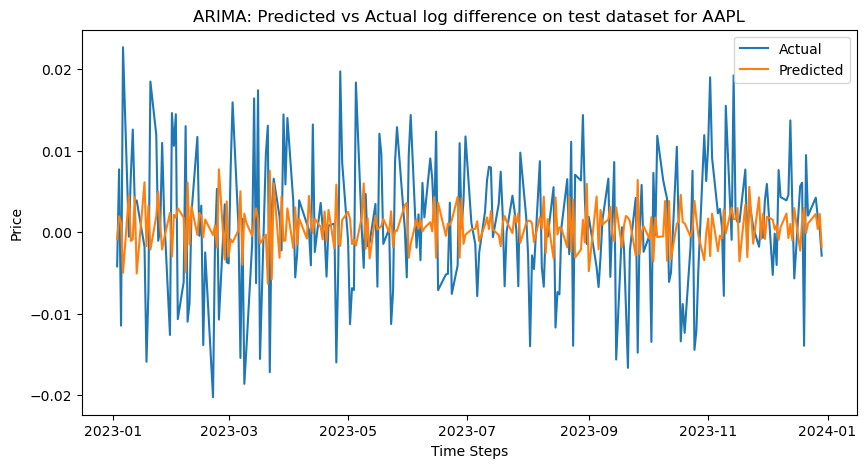

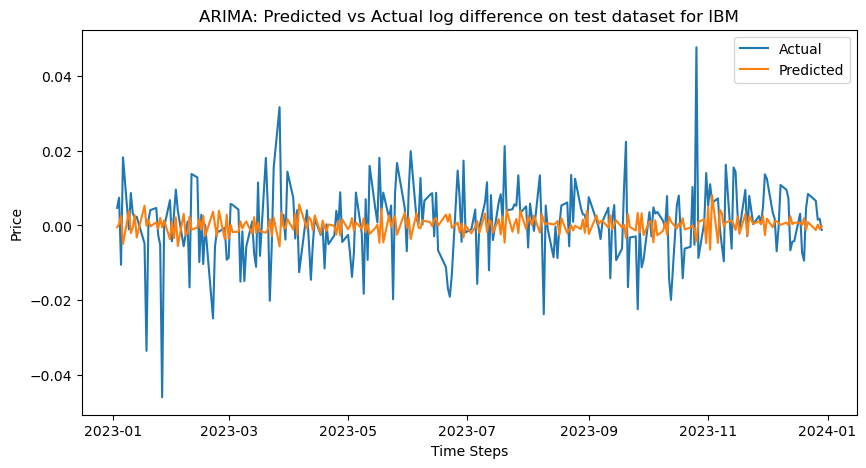

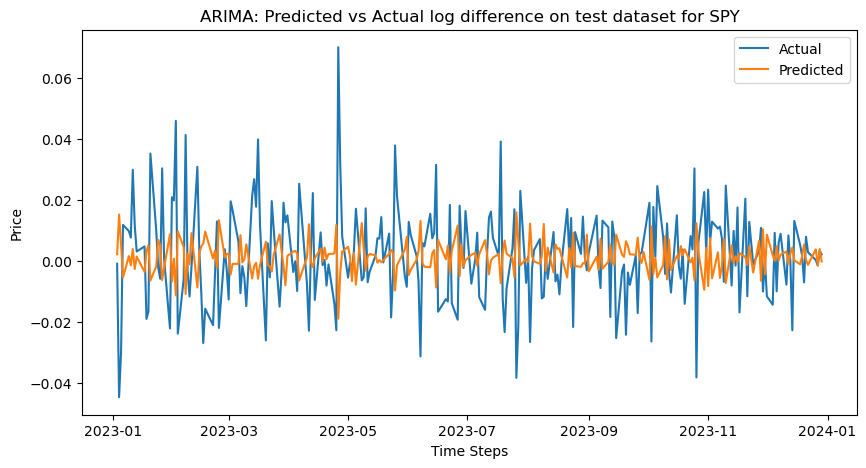

ARIMA: mean Squared Error for each ticker:
AAPL: Train MSE = 0.0040, Valid MSE = 0.0081, Test MSE = 0.0022
IBM: Train MSE = 0.0054, Valid MSE = 0.0048, Test MSE = 0.0021
SPY: Train MSE = 0.0037, Valid MSE = 0.0096, Test MSE = 0.0047


In [4]:
for m in [LinearRegression,ARIMA]:
    ModelRC.Visualization(m,True)

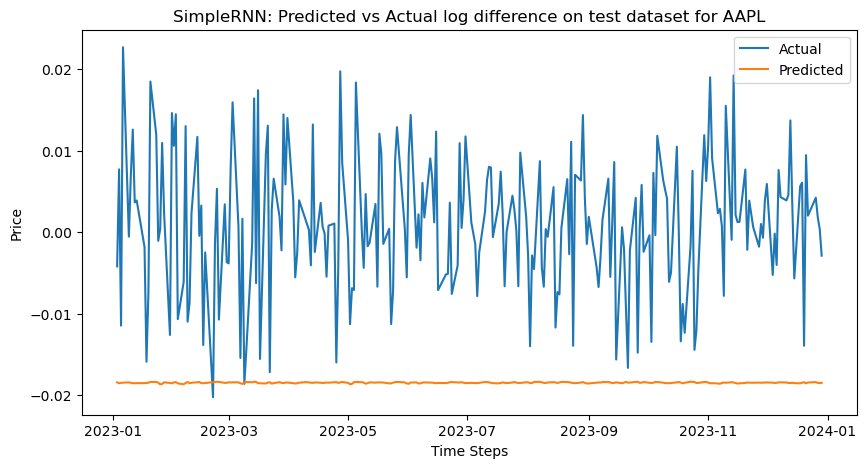

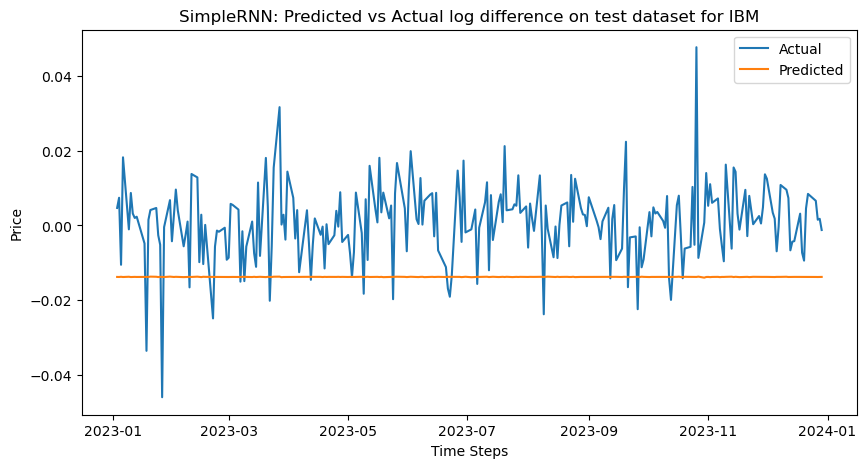

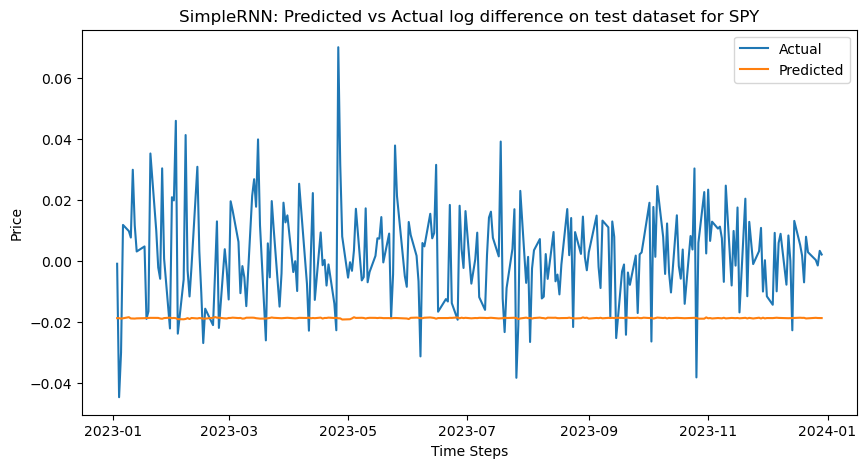

SimpleRNN: mean Squared Error for each ticker:
AAPL: Train MSE = 0.0137, Valid MSE = 0.0137, Test MSE = 0.0108
IBM: Train MSE = 0.0090, Valid MSE = 0.0074, Test MSE = 0.0052
SPY: Train MSE = 0.0091, Valid MSE = 0.0096, Test MSE = 0.0078


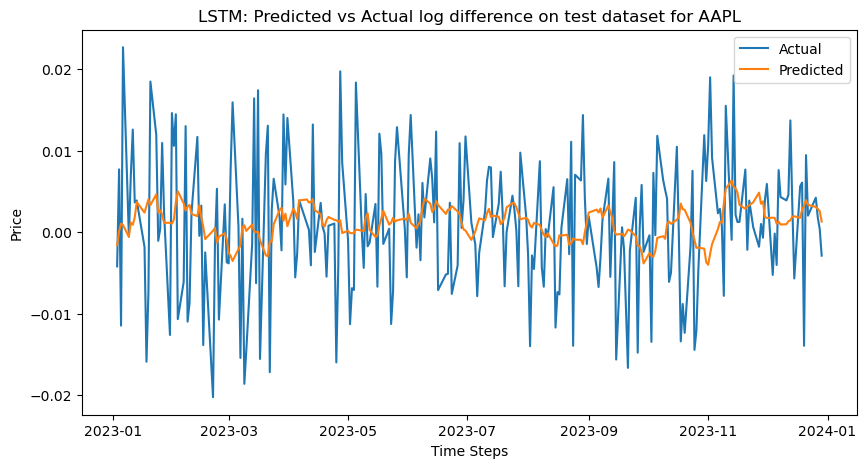

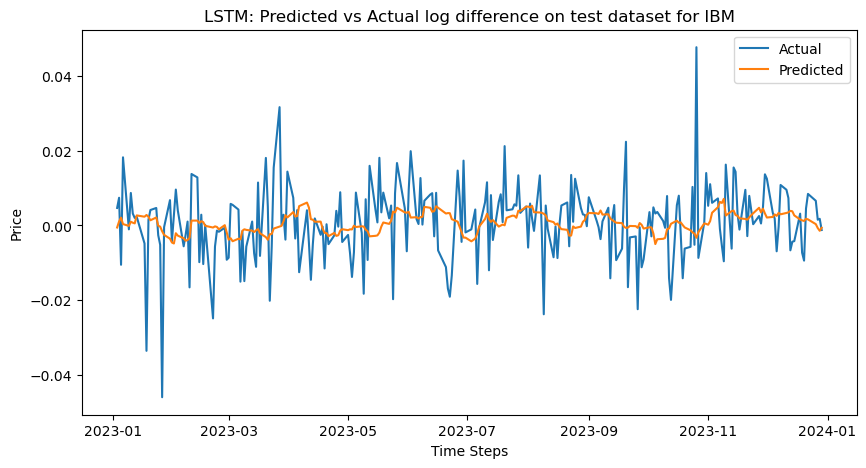

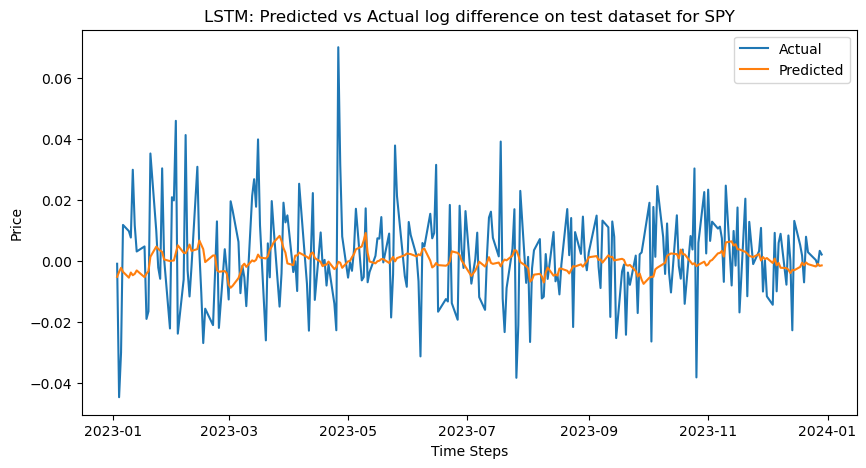

LSTM: mean Squared Error for each ticker:
AAPL: Train MSE = 0.0049, Valid MSE = 0.0063, Test MSE = 0.0017
IBM: Train MSE = 0.0059, Valid MSE = 0.0043, Test MSE = 0.0018
SPY: Train MSE = 0.0046, Valid MSE = 0.0062, Test MSE = 0.0030


In [5]:
for m in [SimpleRNN,LSTM]:
    ModelRNN.Visualization(m,True)



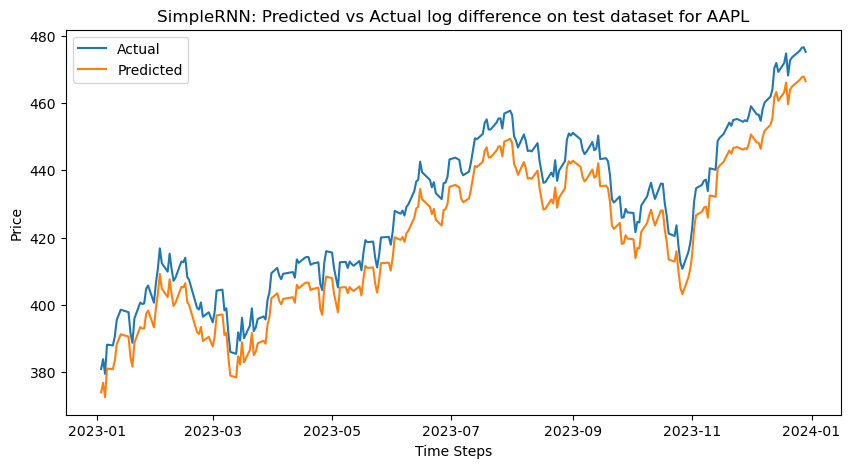

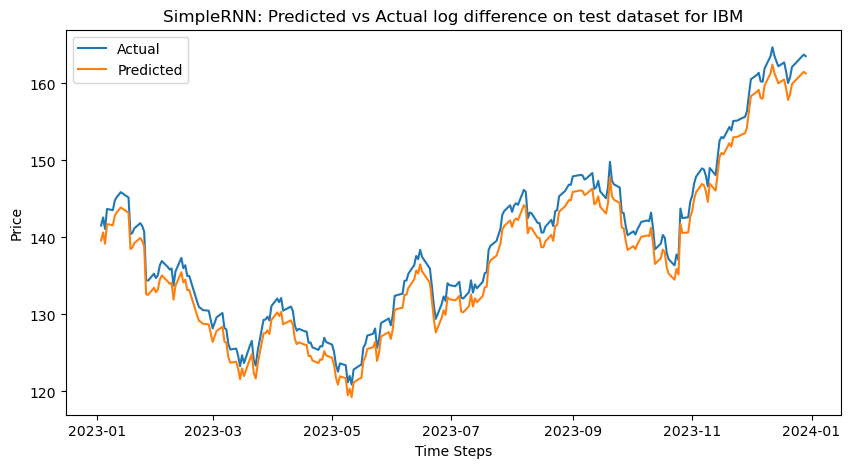

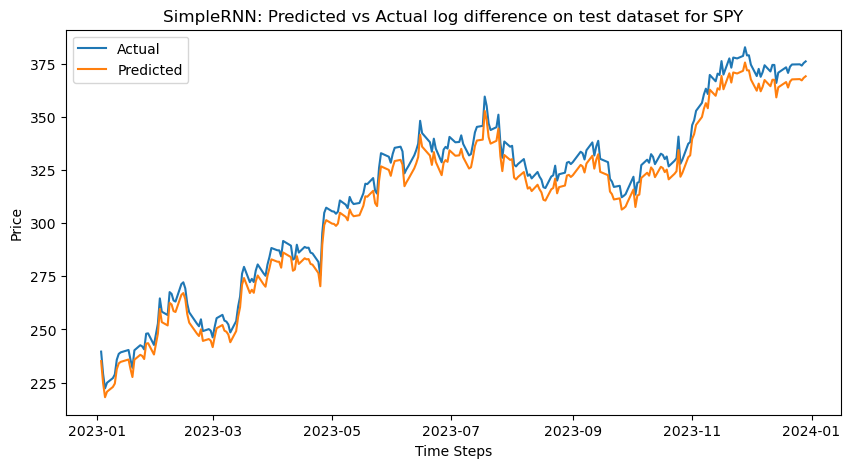

SimpleRNN: mean Squared Error for each ticker:
AAPL: Train MSE = 0.0137, Valid MSE = 0.0137, Test MSE = 0.0108
IBM: Train MSE = 0.0090, Valid MSE = 0.0074, Test MSE = 0.0052
SPY: Train MSE = 0.0091, Valid MSE = 0.0096, Test MSE = 0.0078


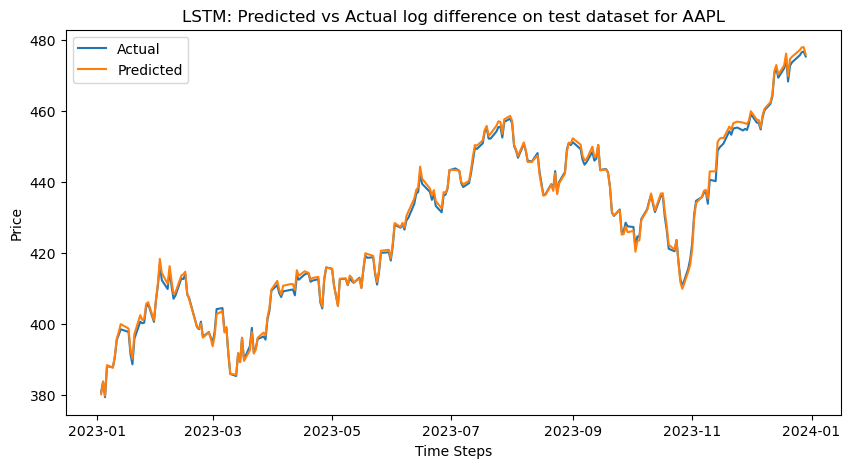

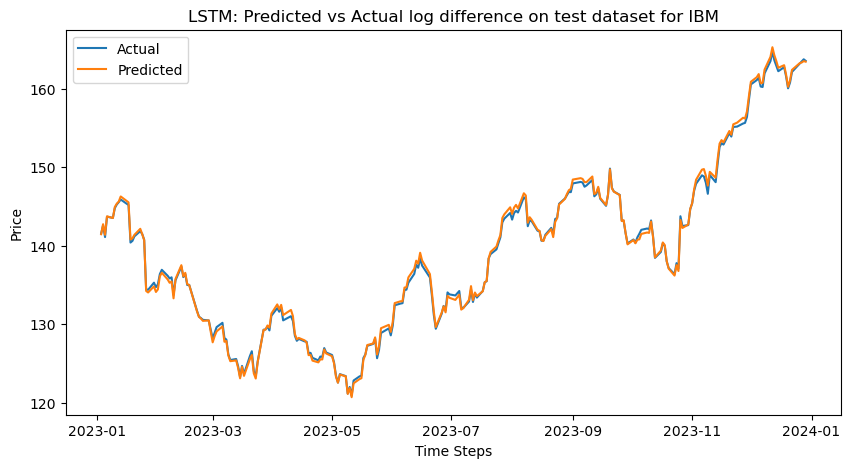

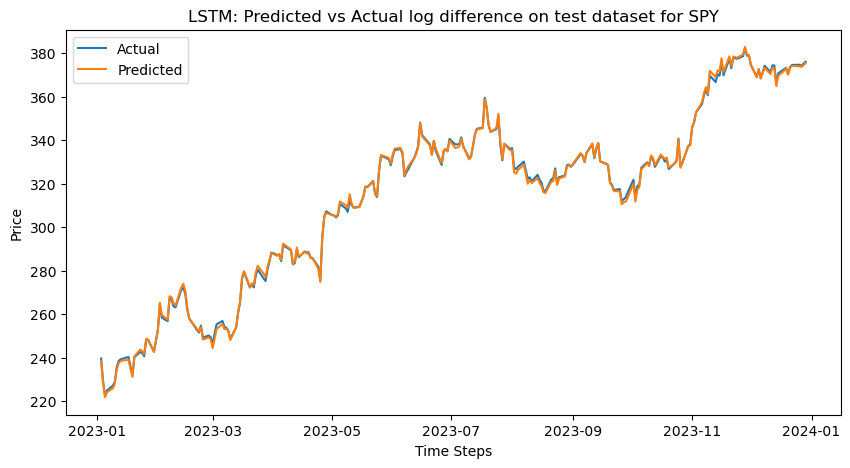

LSTM: mean Squared Error for each ticker:
AAPL: Train MSE = 0.0049, Valid MSE = 0.0063, Test MSE = 0.0017
IBM: Train MSE = 0.0059, Valid MSE = 0.0043, Test MSE = 0.0018
SPY: Train MSE = 0.0046, Valid MSE = 0.0062, Test MSE = 0.0030


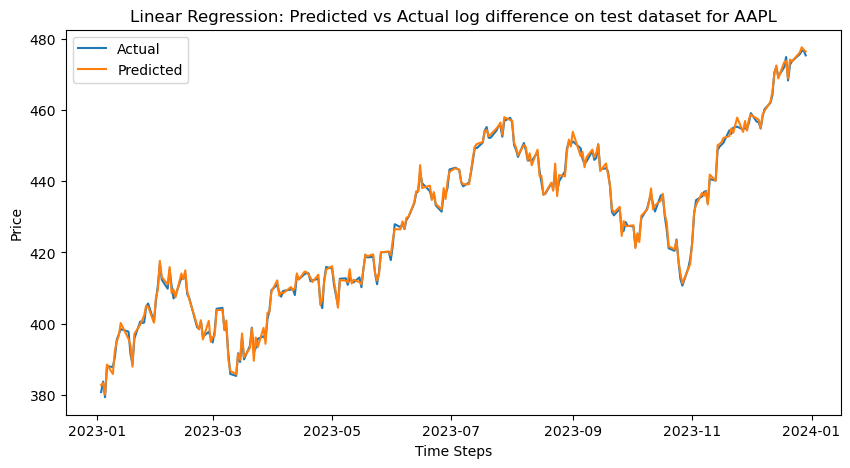

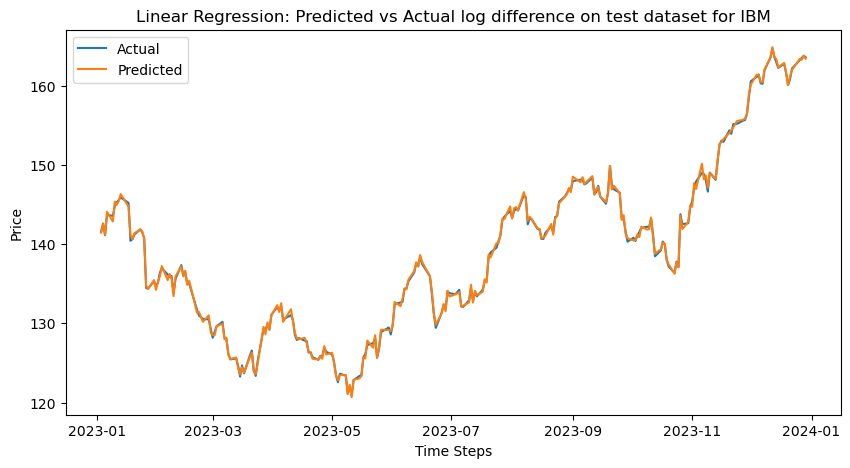

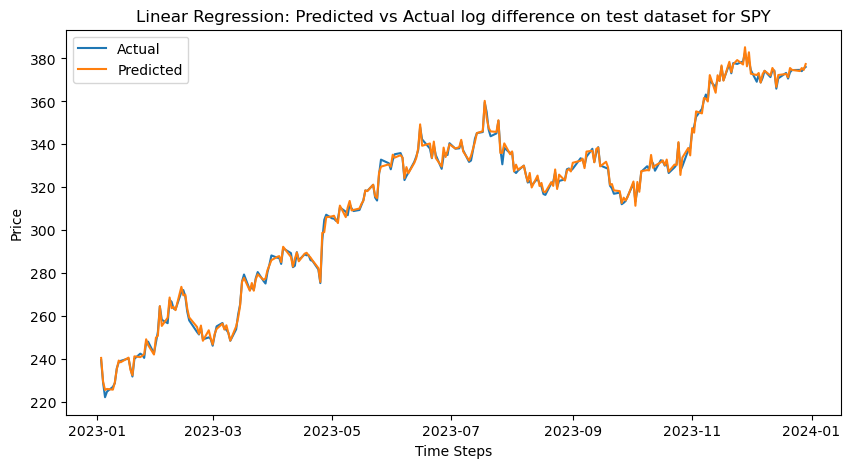

Linear Regression: mean Squared Error for each ticker:
AAPL: Train MSE = 0.0040, Valid MSE = 0.0062, Test MSE = 0.0018
IBM: Train MSE = 0.0054, Valid MSE = 0.0042, Test MSE = 0.0018
SPY: Train MSE = 0.0037, Valid MSE = 0.0064, Test MSE = 0.0031


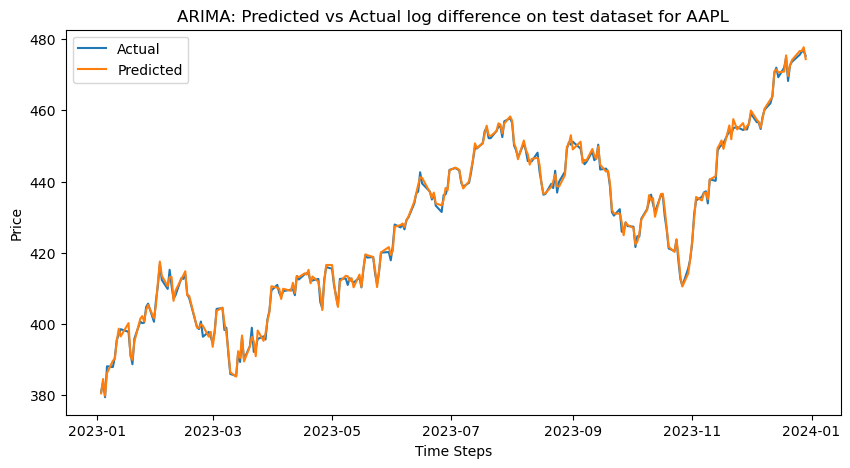

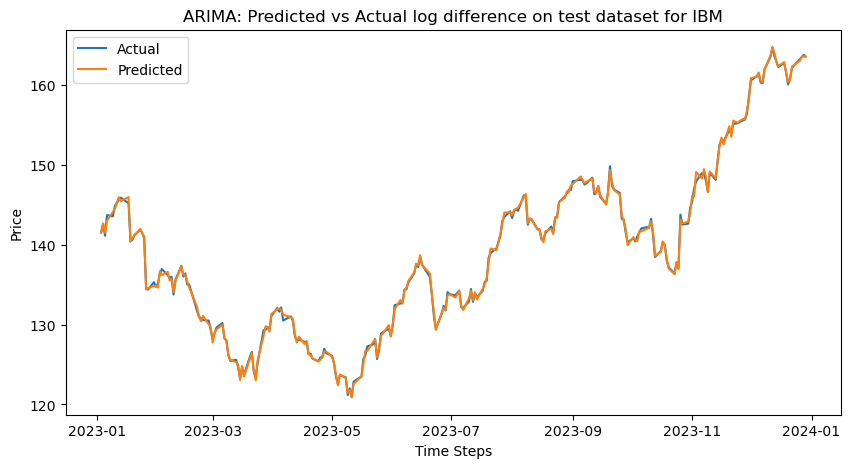

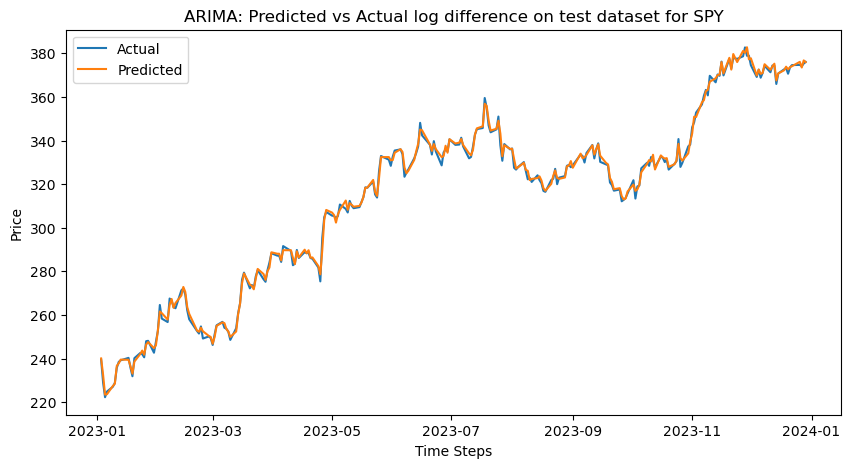

ARIMA: mean Squared Error for each ticker:
AAPL: Train MSE = 0.0040, Valid MSE = 0.0081, Test MSE = 0.0022
IBM: Train MSE = 0.0054, Valid MSE = 0.0048, Test MSE = 0.0021
SPY: Train MSE = 0.0037, Valid MSE = 0.0096, Test MSE = 0.0047


In [6]:
for m in [SimpleRNN,LSTM]:
    ModelRNN.Visualization(m,True, False)

for m in [LinearRegression,ARIMA]:
    ModelRC.Visualization(m,True, False)

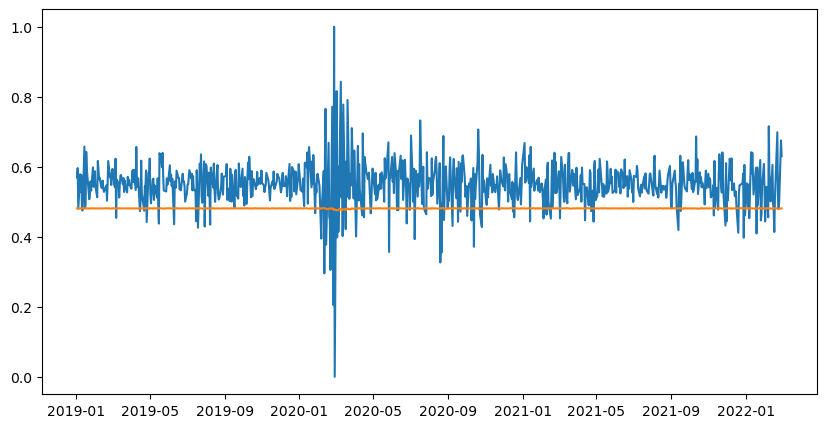

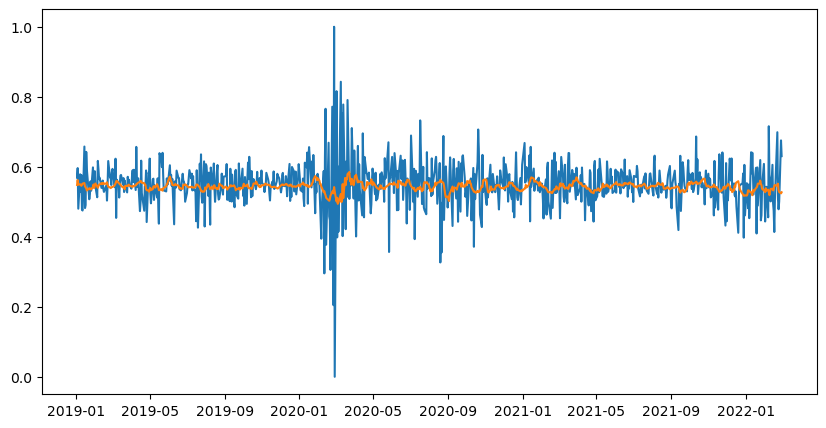

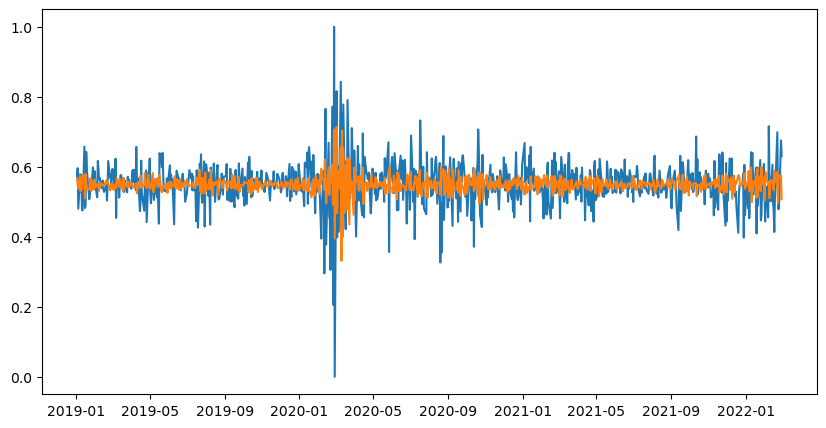

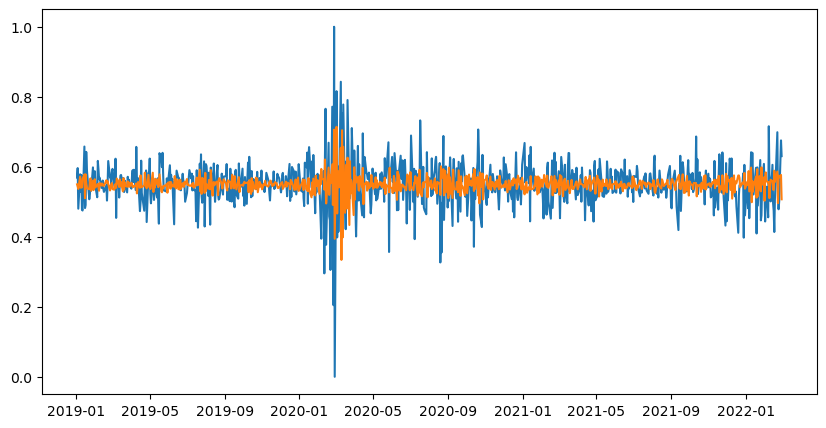

In [7]:
import matplotlib.pyplot as plt
name = 'SPY'
n_train = len(ModelRNN.y_train[name])
for model in [SimpleRNN, LSTM]:
    plt.figure(figsize=(10, 5))

    plt.plot(ModelRNN.dates[:n_train], ModelRNN.y_train[name], label="Actual")
    plt.plot(ModelRNN.dates[:n_train], ModelRNN.train_pred[name][model], label="Predicted")

for model in [LinearRegression, ARIMA]:
    plt.figure(figsize=(10, 5))
    
    plt.plot(ModelRC.dates[:n_train], ModelRC.y_train[name], label="Actual")
    plt.plot(ModelRC.dates[:n_train], ModelRC.train_pred[name][model], label="Predicted")